In [1]:
import pandas as pd
import numpy as np

class kmeans:
    def __init__(self, k=3, tol=1e-4, max_iter=500):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.centroids = {}
    
    def cluster(self, data):
        X = data.values

        center = [X[:,0].mean(), X[:,1].mean()]
        for i in range(self.k):
            self.centroids[i] = (center+X[i])/2
        
        for _ in range(self.max_iter):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []
            for i in X:
                dist = [np.linalg.norm(i - self.centroids[centroid]) for centroid in self.centroids]
                class_label = dist.index(min(dist))
                self.classes[class_label].append(i)
            for label in self.classes:
                self.centroids[label] = np.average(self.classes[label],axis=0)
        
        self.labels = []
        for i in X:
            dist = [np.linalg.norm(i - self.centroids[centroid]) for centroid in self.centroids]
            self.labels.append(dist.index(min(dist)))
        
        return self.labels


In [2]:
df = pd.read_csv('data.csv')

In [3]:
%%time

labels = kmeans(3).cluster(df)

Wall time: 824 ms


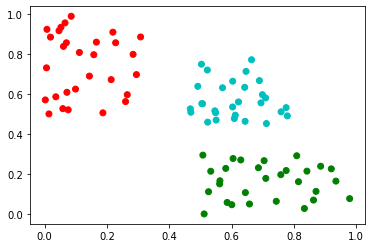

In [4]:
from matplotlib import pyplot as plt
colors = ["r", "g", "c", "b", "k"]

plt.scatter(df.iloc[:, 0], df.iloc[:, 1],
    color=[colors[labels[i]] for i in range(len(df))])